In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
np.set_printoptions(precision = 2)

In [2]:
life_sat = pd.read_csv("../../Datasets/lifesat_full.csv")

In [3]:
X_main = life_sat[["GDP per capita (USD)"]].values
y = life_sat["Life satisfaction"].values

In [4]:
def polynomial(x, degree):
    if x.ndim == 1:
        x = x.reshape(-1, 1)

    x_poly = x.copy()

    for power in range(2, degree + 1):
        x_poly = np.hstack([x_poly, x ** power])

    return x_poly

In [26]:
def add_bias_column(x):
    x = np.hstack([np.ones((x.shape[0], 1)), x])
    return x

In [105]:
X = polynomial(X_main, degree = 1)
X = add_bias_column(X)

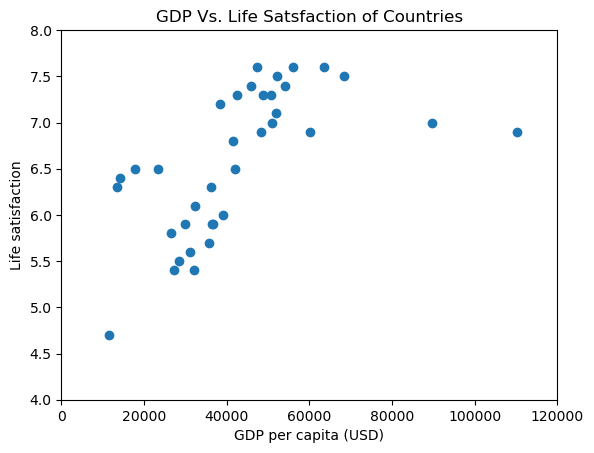

In [107]:
plt.scatter(X_main, y)
plt.title("GDP Vs. Life Satsfaction of Countries")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.axis([0, 120000, 4, 8]);

In [108]:
def cost_function(x, y, theta):
    m, _ = x.shape
    f_theta = x.dot(theta)
    error = f_theta - y
    cost = 1/(2*m) * np.sum(error ** 2)
    return cost

In [111]:
def gradient_function(x, y, theta):
    m, _ = x.shape
    f_theta = np.dot(x, theta)
    error = f_theta - y
    dh_dtheta = 1/m * np.dot(x.T, error)
    return dh_dtheta

In [113]:
def gradient_descent(x, y, theta_in, a, num_iters):
    m, _ = x.shape
    theta = theta_in
    h_history = []
    p_history = []

    for i in range(num_iters):
        dh_dt = gradient_function(x, y, theta)
        theta -= a * dh_dt
        h_history.append(cost_function(x, y, theta))
        p_history.append(theta)

        if i % math.ceil(num_iters/10) == 0:
            print(f"iteration {i:5}: {h_history[-1]:.2e},",
                 f"dh_dt: {dh_dt}, theta: {theta}")
            
    plt.plot(h_history[:100], color = 'green')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    return theta

iteration     0: 1.45e+01, dh_dt: [-6.58e+00 -2.89e+05], theta: [6.58e-10 2.89e-05]
iteration 1000000: 2.93e+00, dh_dt: [-9.82e-01  1.90e-05], theta: [9.82e-05 1.31e-04]
iteration 2000000: 2.93e+00, dh_dt: [-9.81e-01  1.90e-05], theta: [0. 0.]
iteration 3000000: 2.93e+00, dh_dt: [-9.81e-01  1.90e-05], theta: [0. 0.]
iteration 4000000: 2.93e+00, dh_dt: [-9.81e-01  1.90e-05], theta: [0. 0.]
iteration 5000000: 2.93e+00, dh_dt: [-9.81e-01  1.90e-05], theta: [0. 0.]
iteration 6000000: 2.92e+00, dh_dt: [-9.81e-01  1.90e-05], theta: [0. 0.]
iteration 7000000: 2.92e+00, dh_dt: [-9.81e-01  1.90e-05], theta: [0. 0.]
iteration 8000000: 2.92e+00, dh_dt: [-9.81e-01  1.90e-05], theta: [0. 0.]
iteration 9000000: 2.92e+00, dh_dt: [-9.81e-01  1.90e-05], theta: [0. 0.]


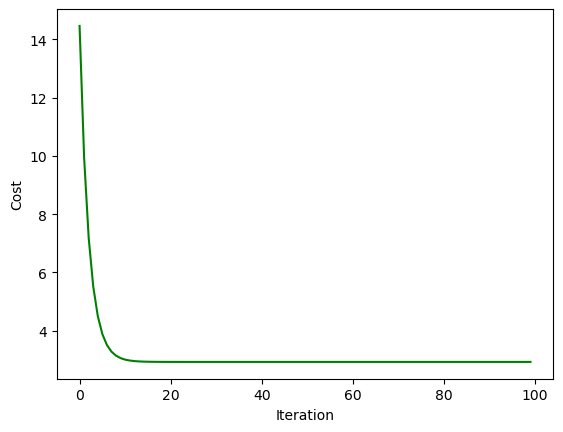

In [125]:
theta_initial = np.zeros(X.shape[1])
alpha = 1.0e-10
iterations = 10000000
theta_final = gradient_descent(X, y, theta_initial, alpha, iterations)

In [127]:
y_predicted = np.dot(X, theta_final)

In [129]:
y_predicted

array([ 1.51,  1.76,  1.85,  2.35,  3.06,  3.47,  3.58,  3.73,  3.93,
        4.07,  4.22,  4.23,  4.68,  4.75,  4.8 ,  4.82,  5.03,  5.12,
        5.46,  5.52,  5.57,  6.02,  6.2 ,  6.33,  6.39,  6.65,  6.68,
        6.82,  6.86,  7.11,  7.34,  7.91,  8.34,  8.98, 11.77, 14.47])

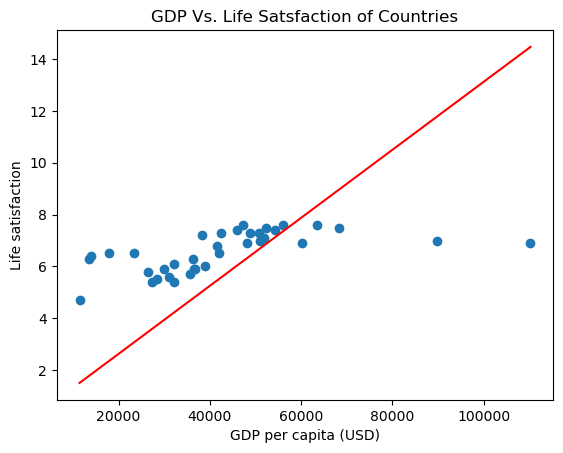

In [131]:
plt.scatter(X_main, y)
plt.plot(X_main, y_predicted, color = 'red')
plt.title("GDP Vs. Life Satsfaction of Countries")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction");